# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.
Business Goal: You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

Dataset characteristics
=========================================	
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

In [2]:
#importing data

df=pd.read_csv("C:\\Users\\imvv44\\Desktop\\Imarticus\\Linear Regression  10 Project\\Bike Sharing Multiple Linear Regression\\day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
df.shape

(730, 16)

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
df.dtypes.index

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
## selecting all categorical variable columns
categorical_columns = df.dtypes[df.dtypes == 'object'].index
print(categorical_columns)

Index(['dteday'], dtype='object')


In [10]:
## selecting all Numericalvariable columns
Numerical_columns = df.dtypes[df.dtypes == 'int64'].index
print(Numerical_columns)

Index(['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'casual', 'registered', 'cnt'],
      dtype='object')


In [11]:
Numerical_columns = df.dtypes[df.dtypes == 'float64'].index
print(Numerical_columns)

Index(['temp', 'atemp', 'hum', 'windspeed'], dtype='object')


In [12]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# dteday

In [13]:
df.dteday.value_counts()

01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: dteday, Length: 730, dtype: int64

# season

In [14]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

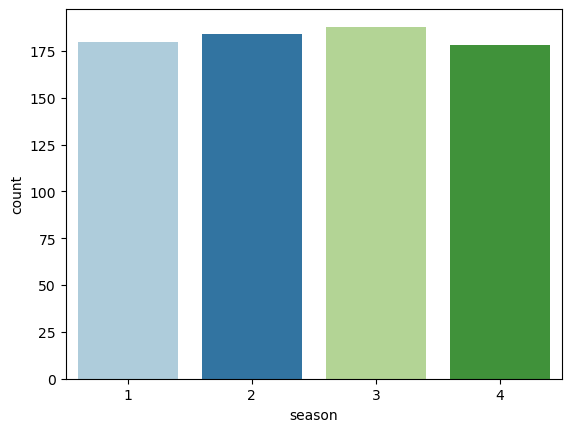

In [15]:
sns.countplot(df.season,palette='Paired')

In [16]:
model = ols("cnt~season", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)


             df        sum_sq       mean_sq          F  PR(>F)
season      1.0  4.472604e+08  4.472604e+08  142.48857     0.0
Residual  728.0  2.285135e+09  3.138921e+06        NaN     NaN


In [17]:
a=pd.crosstab(df.season,df.cnt)
chi2_contingency(a)[1]

0.5436675526461316

In [18]:
df.drop('season',axis=1,inplace=True)

# Yr

In [19]:
df.yr.value_counts()

0    365
1    365
Name: yr, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yr', ylabel='count'>

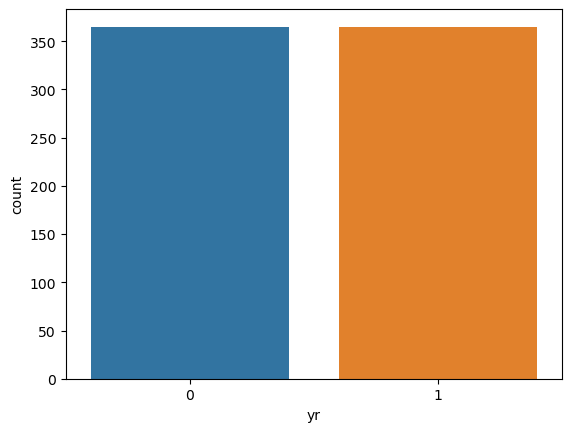

In [20]:
sns.countplot(df.yr)

In [21]:
model = ols("yr~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

             df     sum_sq   mean_sq          F  PR(>F)
cnt         1.0   59.23777  59.23777  349.86465     0.0
Residual  728.0  123.26223   0.16932        NaN     NaN


In [22]:
a=pd.crosstab(df.yr,df.cnt)
chi2_contingency(a)[1]

0.36763306963225334

In [23]:
df.drop('yr',axis=1,inplace=True)

# mnth

In [24]:
df.mnth.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='count'>

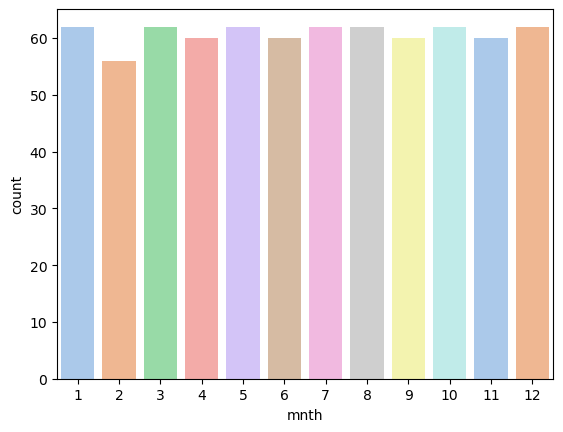

In [25]:
sns.countplot(df.mnth,palette='pastel')

In [26]:
# model = ols("mnth~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

             df     sum_sq   mean_sq          F  PR(>F)
cnt         1.0   59.23777  59.23777  349.86465     0.0
Residual  728.0  123.26223   0.16932        NaN     NaN


In [27]:
a=pd.crosstab(df.mnth,df.cnt)
chi2_contingency(a)[1]



0.49039950360142937

In [28]:
df.drop('mnth',axis=1,inplace=True)

# holiday

In [29]:
df.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='holiday', ylabel='count'>

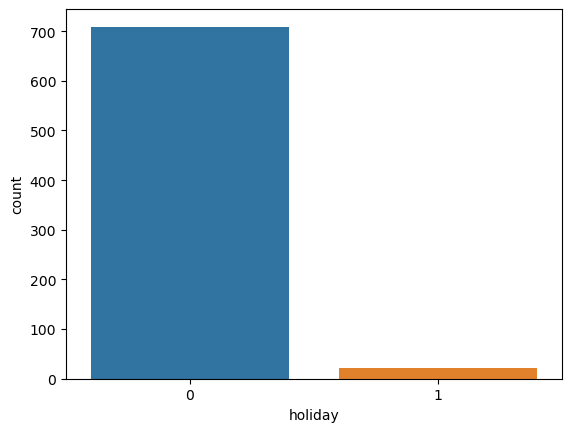

In [30]:
sns.countplot(df.holiday)

In [31]:
model = ols("holiday~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

             df    sum_sq  mean_sq        F   PR(>F)
cnt         1.0   0.09644  0.09644  3.45867  0.06332
Residual  728.0  20.29945  0.02788      NaN      NaN


In [32]:
df.drop('holiday',inplace=True,axis=1)

# weekday

In [33]:
df.weekday.value_counts()

6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weekday', ylabel='count'>

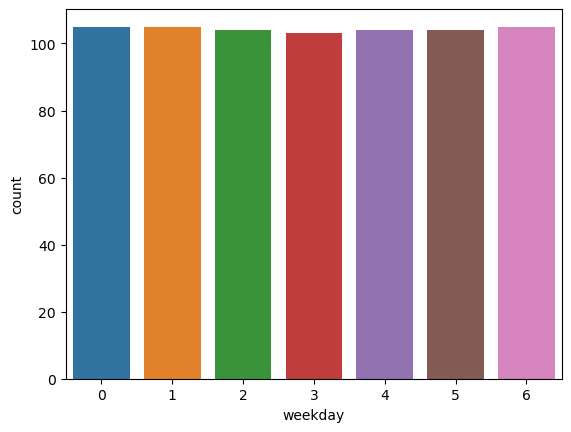

In [34]:
sns.countplot(df.weekday)

In [35]:
model = ols("weekday~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

             df      sum_sq   mean_sq        F   PR(>F)
cnt         1.0    13.38151  13.38151  3.33551  0.06821
Residual  728.0  2920.61301   4.01183      NaN      NaN


In [36]:
df.drop('weekday',axis=1,inplace=True)

# workingday

In [37]:
df.workingday.value_counts()

1    499
0    231
Name: workingday, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='workingday', ylabel='count'>

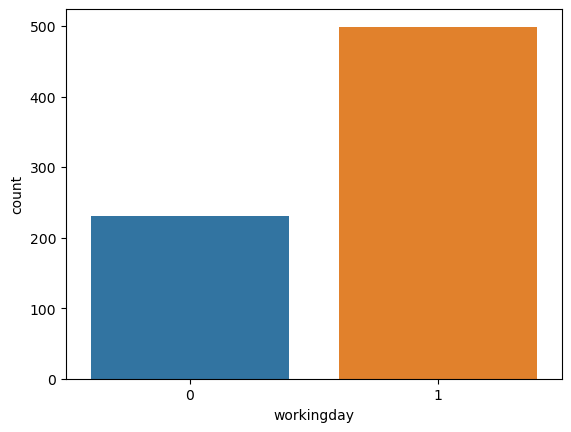

In [38]:
sns.countplot(df.workingday)

In [39]:
model=ols('workingday~cnt',data=df).fit()
anova=sm.stats.anova_lm(model,type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
cnt,1.0,0.617632,0.617632,2.858732,0.091307
Residual,728.0,157.285108,0.216051,NaN,NaN


In [40]:
df.drop('workingday',axis=1,inplace=True)

# weathersit

In [41]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weathersit', ylabel='count'>

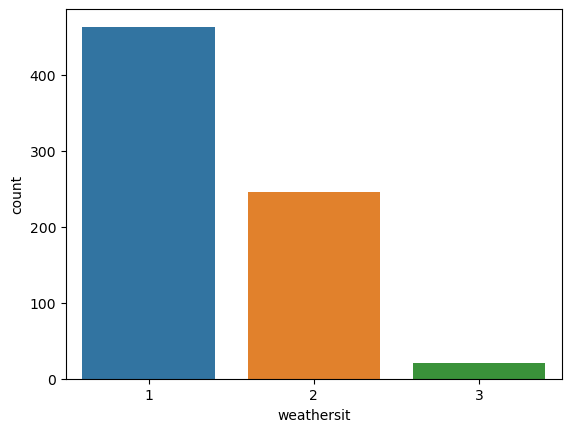

In [42]:
sns.countplot(df.weathersit)

In [43]:
model = ols("weathersit~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
print(anova)

             df      sum_sq    mean_sq          F        PR(>F)
cnt         1.0   18.949040  18.949040  69.872704  3.202838e-16
Residual  728.0  197.429042   0.271194        NaN           NaN


# temp

In [44]:
df.temp.value_counts()

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temp', ylabel='Density'>

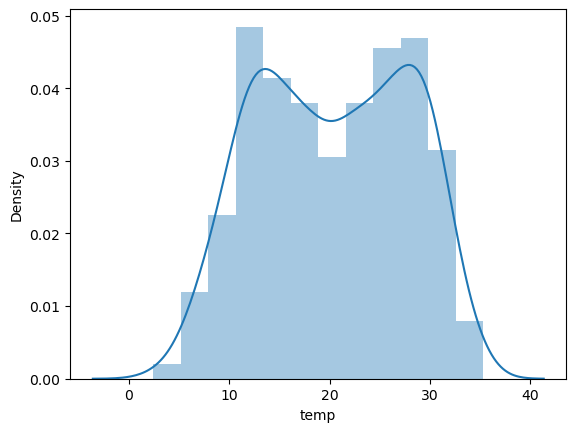

In [45]:
sns.distplot(df.temp)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

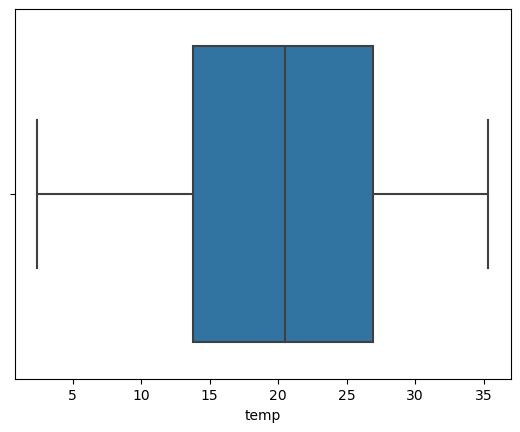

In [46]:
sns.boxplot(df.temp)

In [47]:
model = ols("temp~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
cnt,1.0,16151.954303,16151.954303,471.705125,5.072391e-81
Residual,728.0,24927.909630,34.241634,NaN,NaN


# atemp

In [48]:
df.atemp.value_counts()

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145    1
30.10650    1
31.34500    1
11.17435    1
Name: atemp, Length: 689, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='atemp', ylabel='Density'>

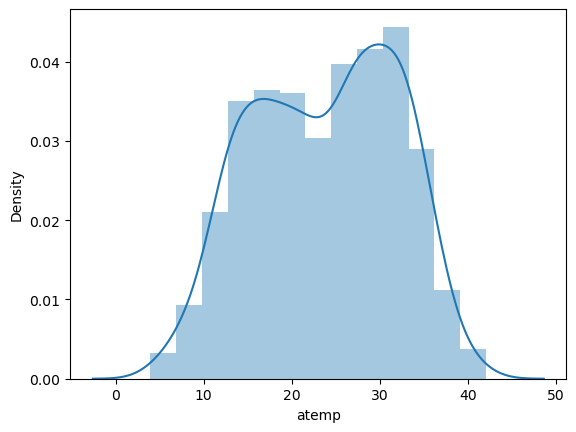

In [49]:
sns.distplot(df.atemp)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

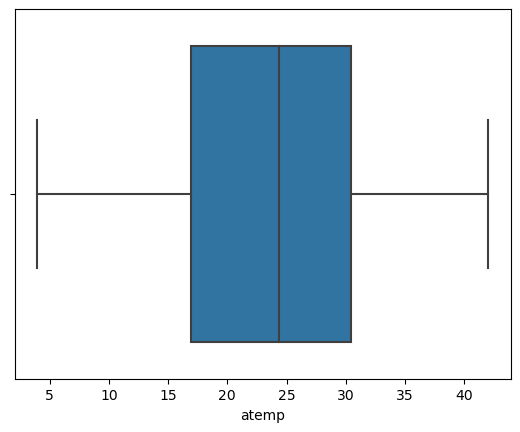

In [50]:
sns.boxplot(df.atemp)

In [51]:
model = ols("atemp~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
cnt,1.0,19261.984526,19261.984526,480.828452,3.199612e-82
Residual,728.0,29163.675090,40.059993,NaN,NaN


# hum

In [52]:
df.hum.value_counts()

61.3333    4
63.0833    3
55.2083    3
60.5000    3
56.8333    3
          ..
54.8333    1
56.1765    1
85.0000    1
76.1250    1
57.7500    1
Name: hum, Length: 594, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hum', ylabel='Density'>

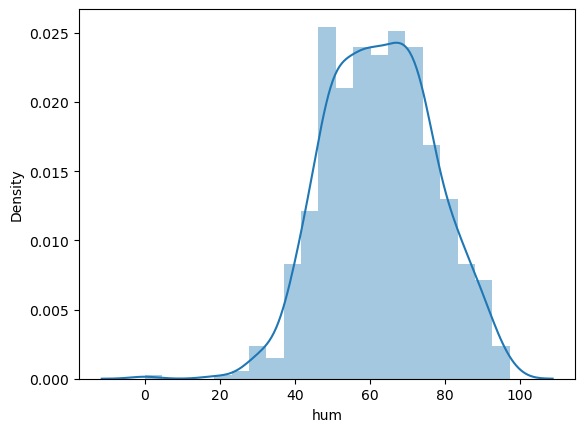

In [53]:
sns.distplot(df.hum)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

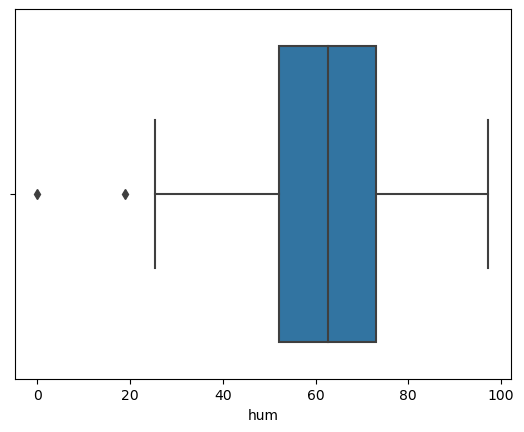

In [54]:
sns.boxplot(df.hum)

In [55]:
q3=df.hum.quantile(0.75)
q1=df.hum.quantile(0.25)
iqr=q3-q1
lower=q1-(1.5*iqr)
df.drop(df[df.hum<lower].index,inplace=True)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

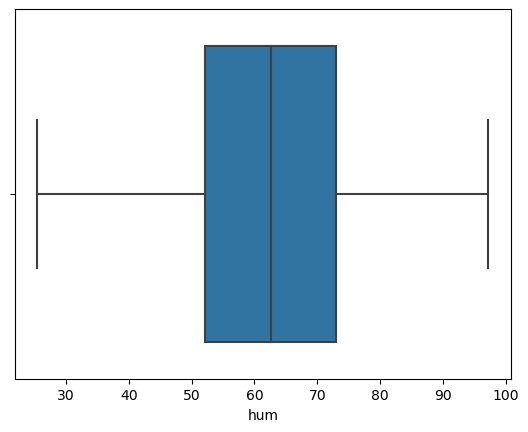

In [56]:
sns.boxplot(df.hum)

In [57]:
model = ols("hum~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

             df        sum_sq     mean_sq         F   PR(>F)
cnt         1.0    2040.87050  2040.87050  10.59509  0.00119
Residual  726.0  139845.16445   192.62419       NaN      NaN


# windspeed

In [58]:
df.windspeed.value_counts()

7.959064     3
11.250104    3
9.041918     3
11.166689    3
15.333486    3
            ..
14.250632    1
23.044181    1
6.500394     1
12.914116    1
10.374682    1
Name: windspeed, Length: 647, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='windspeed', ylabel='Density'>

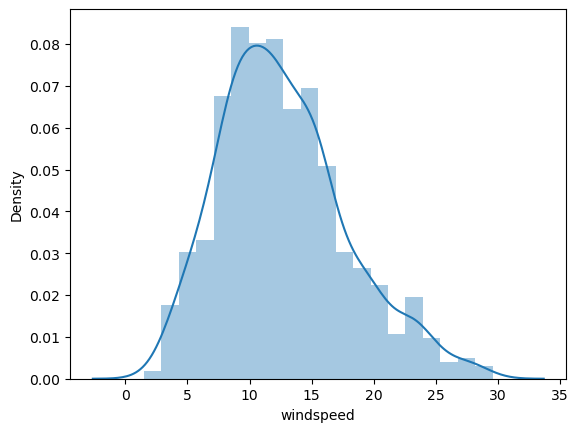

In [59]:
sns.distplot(df.windspeed)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

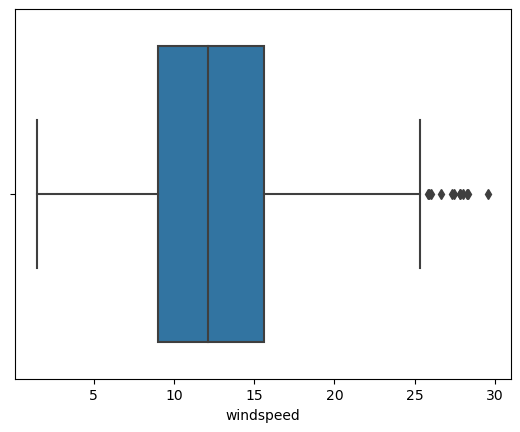

In [60]:
sns.boxplot(df.windspeed)

In [61]:
q3=df.windspeed.quantile(0.75)
q1=df.windspeed.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [62]:
df.windspeed=np.where(df.windspeed>upper,upper,df.windspeed)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='windspeed'>

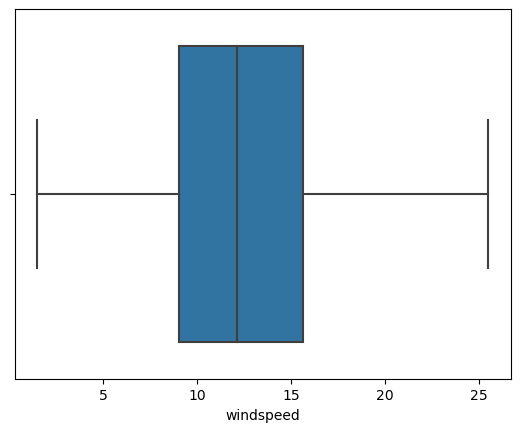

In [63]:
sns.boxplot(df.windspeed)

In [64]:
model = ols("windspeed~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
anova

,df,sum_sq,mean_sq,F,PR(>F)
cnt,1.0,970.149649,970.149649,40.024849,4.384251e-10
Residual,726.0,17597.284055,24.238683,NaN,NaN


# casual

In [65]:
df.casual.value_counts()

120     4
968     4
653     3
244     3
140     3
       ..
1236    1
2521    1
1935    1
783     1
364     1
Name: casual, Length: 604, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='casual', ylabel='Density'>

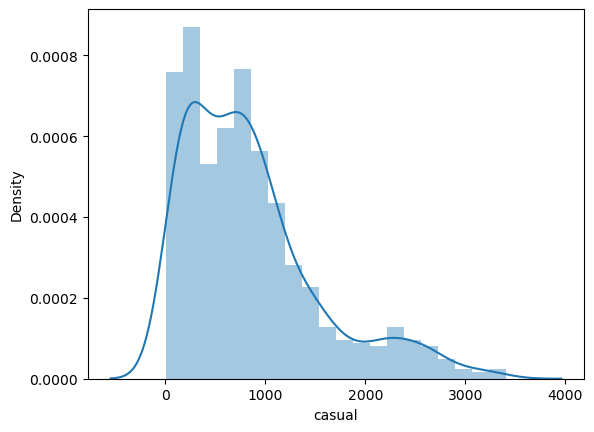

In [66]:
sns.distplot(df.casual)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='casual'>

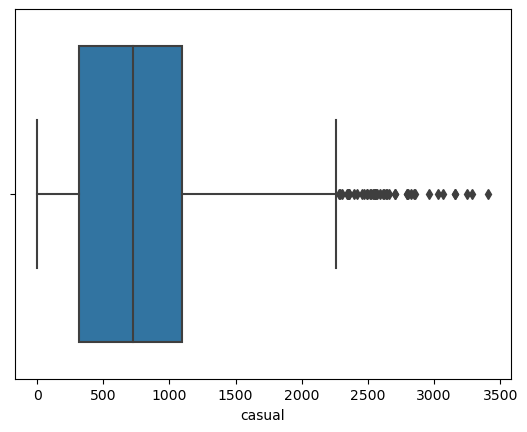

In [67]:
sns.boxplot(df.casual)

In [68]:
q3=df.casual.quantile(0.75)
q1=df.casual.quantile(0.25)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)

In [69]:
df.casual=np.where(df.casual>upper,upper,df.casual)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='casual'>

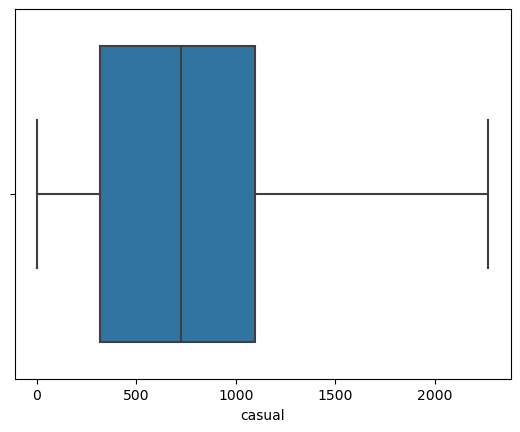

In [70]:
sns.boxplot(df.casual)

In [71]:
model = ols("casual~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

             df        sum_sq       mean_sq          F  PR(>F)
cnt         1.0  1.320477e+08  1.320477e+08  635.23149     0.0
Residual  726.0  1.509160e+08  2.078733e+05        NaN     NaN


# registered

In [72]:
df.registered.value_counts()

1707    3
4841    3
6248    3
4232    2
1628    2
       ..
3231    1
4018    1
3077    1
2921    1
2290    1
Name: registered, Length: 676, dtype: int64

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='registered', ylabel='Density'>

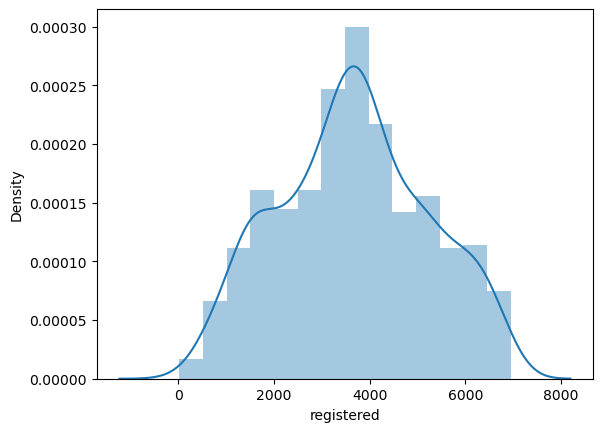

In [73]:
sns.distplot(df.registered)

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='registered'>

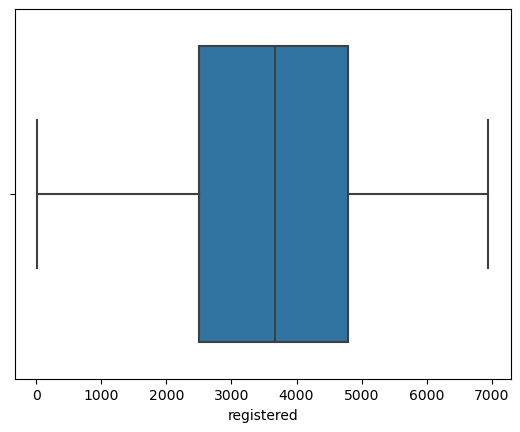

In [74]:
sns.boxplot(df.registered)

In [75]:
model = ols("registered~cnt", data=df).fit()
anova = sm.stats.anova_lm(model,type=2)
ano = anova.round(decimals=5)
print(ano)

             df        sum_sq       mean_sq           F  PR(>F)
cnt         1.0  1.569276e+09  1.569276e+09  6053.72859     0.0
Residual  726.0  1.881971e+08  2.592247e+05         NaN     NaN


In [76]:
df.corr()

,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,-0.017817,0.149025,0.151166,0.001226,-0.106425,0.274803,0.658242,0.627468
weathersit,-0.017817,1.000000,-0.118471,-0.119662,0.621430,0.044047,-0.254276,-0.255423,-0.292377
temp,0.149025,-0.118471,1.000000,0.991691,0.125376,-0.155415,0.572715,0.539345,0.627321
atemp,0.151166,-0.119662,0.991691,1.000000,0.138888,-0.181679,0.573272,0.543724,0.631090
hum,0.001226,0.621430,0.125376,0.138888,1.000000,-0.230896,-0.081370,-0.110878,-0.119933
windspeed,-0.106425,0.044047,-0.155415,-0.181679,-0.230896,1.000000,-0.176343,-0.211124,-0.228583
casual,0.274803,-0.254276,0.572715,0.573272,-0.081370,-0.176343,1.000000,0.411530,0.683125
registered,0.658242,-0.255423,0.539345,0.543724,-0.110878,-0.211124,0.411530,1.000000,0.944942
cnt,0.627468,-0.292377,0.627321,0.631090,-0.119933,-0.228583,0.683125,0.944942,1.000000


<AxesSubplot:>

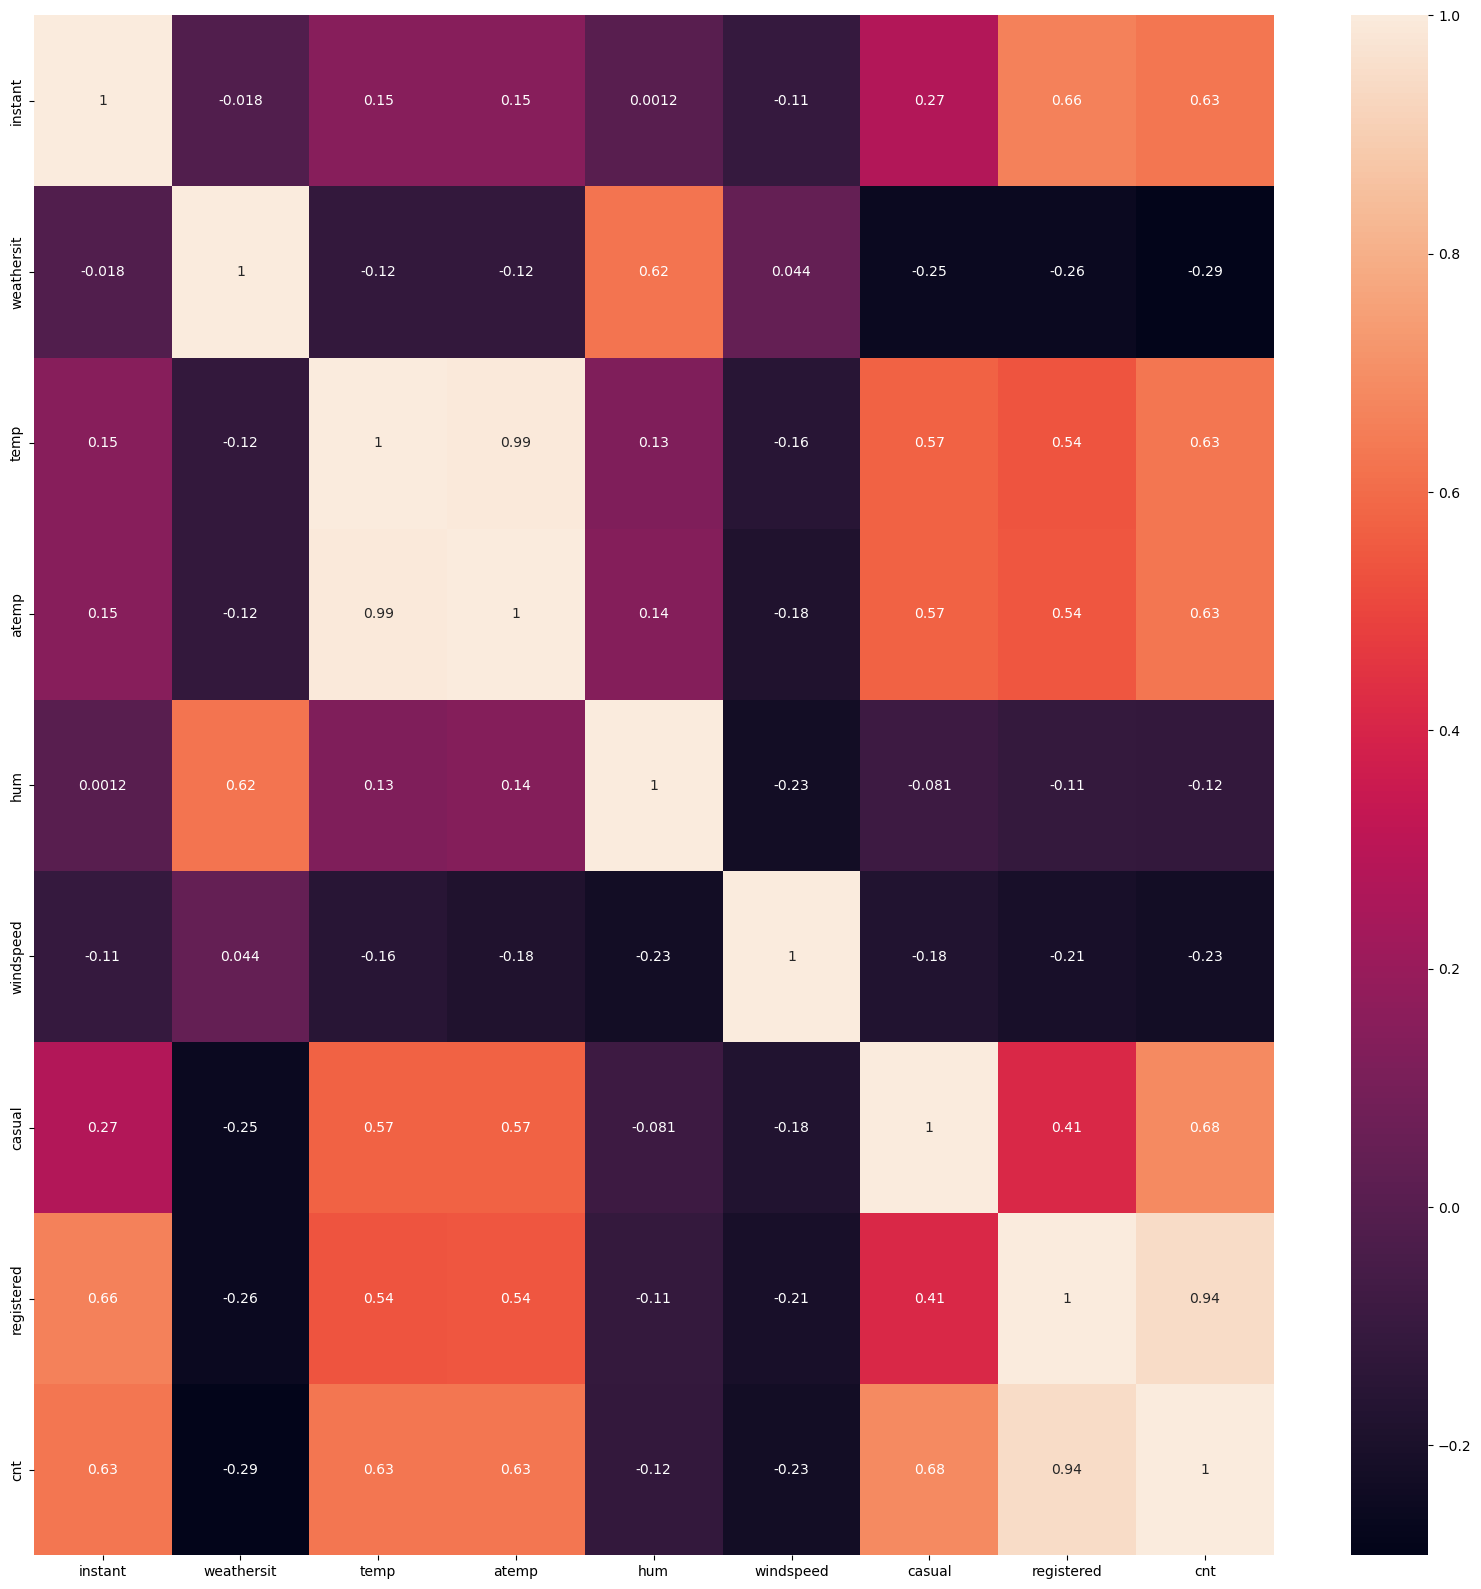

In [77]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     728 non-null    int64  
 1   dteday      728 non-null    object 
 2   weathersit  728 non-null    int64  
 3   temp        728 non-null    float64
 4   atemp       728 non-null    float64
 5   hum         728 non-null    float64
 6   windspeed   728 non-null    float64
 7   casual      728 non-null    float64
 8   registered  728 non-null    int64  
 9   cnt         728 non-null    int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 62.6+ KB


In [79]:
df.dteday=pd.to_datetime(df.dteday)

C:\Users\imvv44\AppData\Local\Temp\ipykernel_5692\579823834.py:1: UserWarning: Parsing '13-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.dteday=pd.to_datetime(df.dteday)
C:\Users\imvv44\AppData\Local\Temp\ipykernel_5692\579823834.py:1: UserWarning: Parsing '14-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.dteday=pd.to_datetime(df.dteday)
C:\Users\imvv44\AppData\Local\Temp\ipykernel_5692\579823834.py:1: UserWarning: Parsing '15-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.dteday=pd.to_datetime(df.dteday)
C:\Users\imvv44\AppData\Local\Temp\ipykernel_5692\579823834.py:1: UserWarning: Parsing '16-01-2018' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.dteday=pd.to_datetime(df.dteday)
C:\Users\imvv44\AppData\Local\Temp\ipykernel_5692\57

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 728 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     728 non-null    int64         
 1   dteday      728 non-null    datetime64[ns]
 2   weathersit  728 non-null    int64         
 3   temp        728 non-null    float64       
 4   atemp       728 non-null    float64       
 5   hum         728 non-null    float64       
 6   windspeed   728 non-null    float64       
 7   casual      728 non-null    float64       
 8   registered  728 non-null    int64         
 9   cnt         728 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 62.6 KB


In [81]:
df['year']=df['dteday'].dt.year

In [82]:
df['month']=df['dteday'].dt.month

In [83]:
df['day']=df['dteday'].dt.day

In [84]:
df.drop('dteday',inplace=True,axis=1)

In [85]:
df.head()

,instant,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month,day
0,1,2,14.110847,18.18125,80.5833,10.749882,331.0,654,985,2018,1,1
1,2,2,14.902598,17.68695,69.6087,16.652113,131.0,670,801,2018,2,1
2,3,1,8.050924,9.47025,43.7273,16.636703,120.0,1229,1349,2018,3,1
3,4,1,8.200000,10.60610,59.0435,10.739832,108.0,1454,1562,2018,4,1
4,5,1,9.305237,11.46350,43.6957,12.522300,82.0,1518,1600,2018,5,1


In [86]:
df.year.value_counts()

2019    365
2018    363
Name: year, dtype: int64

In [87]:
df.month.value_counts()

1     62
3     62
5     62
7     62
8     62
12    62
10    61
4     60
6     60
9     60
11    60
2     55
Name: month, dtype: int64

In [88]:
df.day.value_counts()

1     24
26    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
2     24
28    24
13    24
27    24
25    24
24    24
14    24
15    24
16    24
17    24
18    24
20    24
21    24
22    24
23    24
12    24
3     23
19    23
30    22
29    22
31    14
Name: day, dtype: int64

<AxesSubplot:>

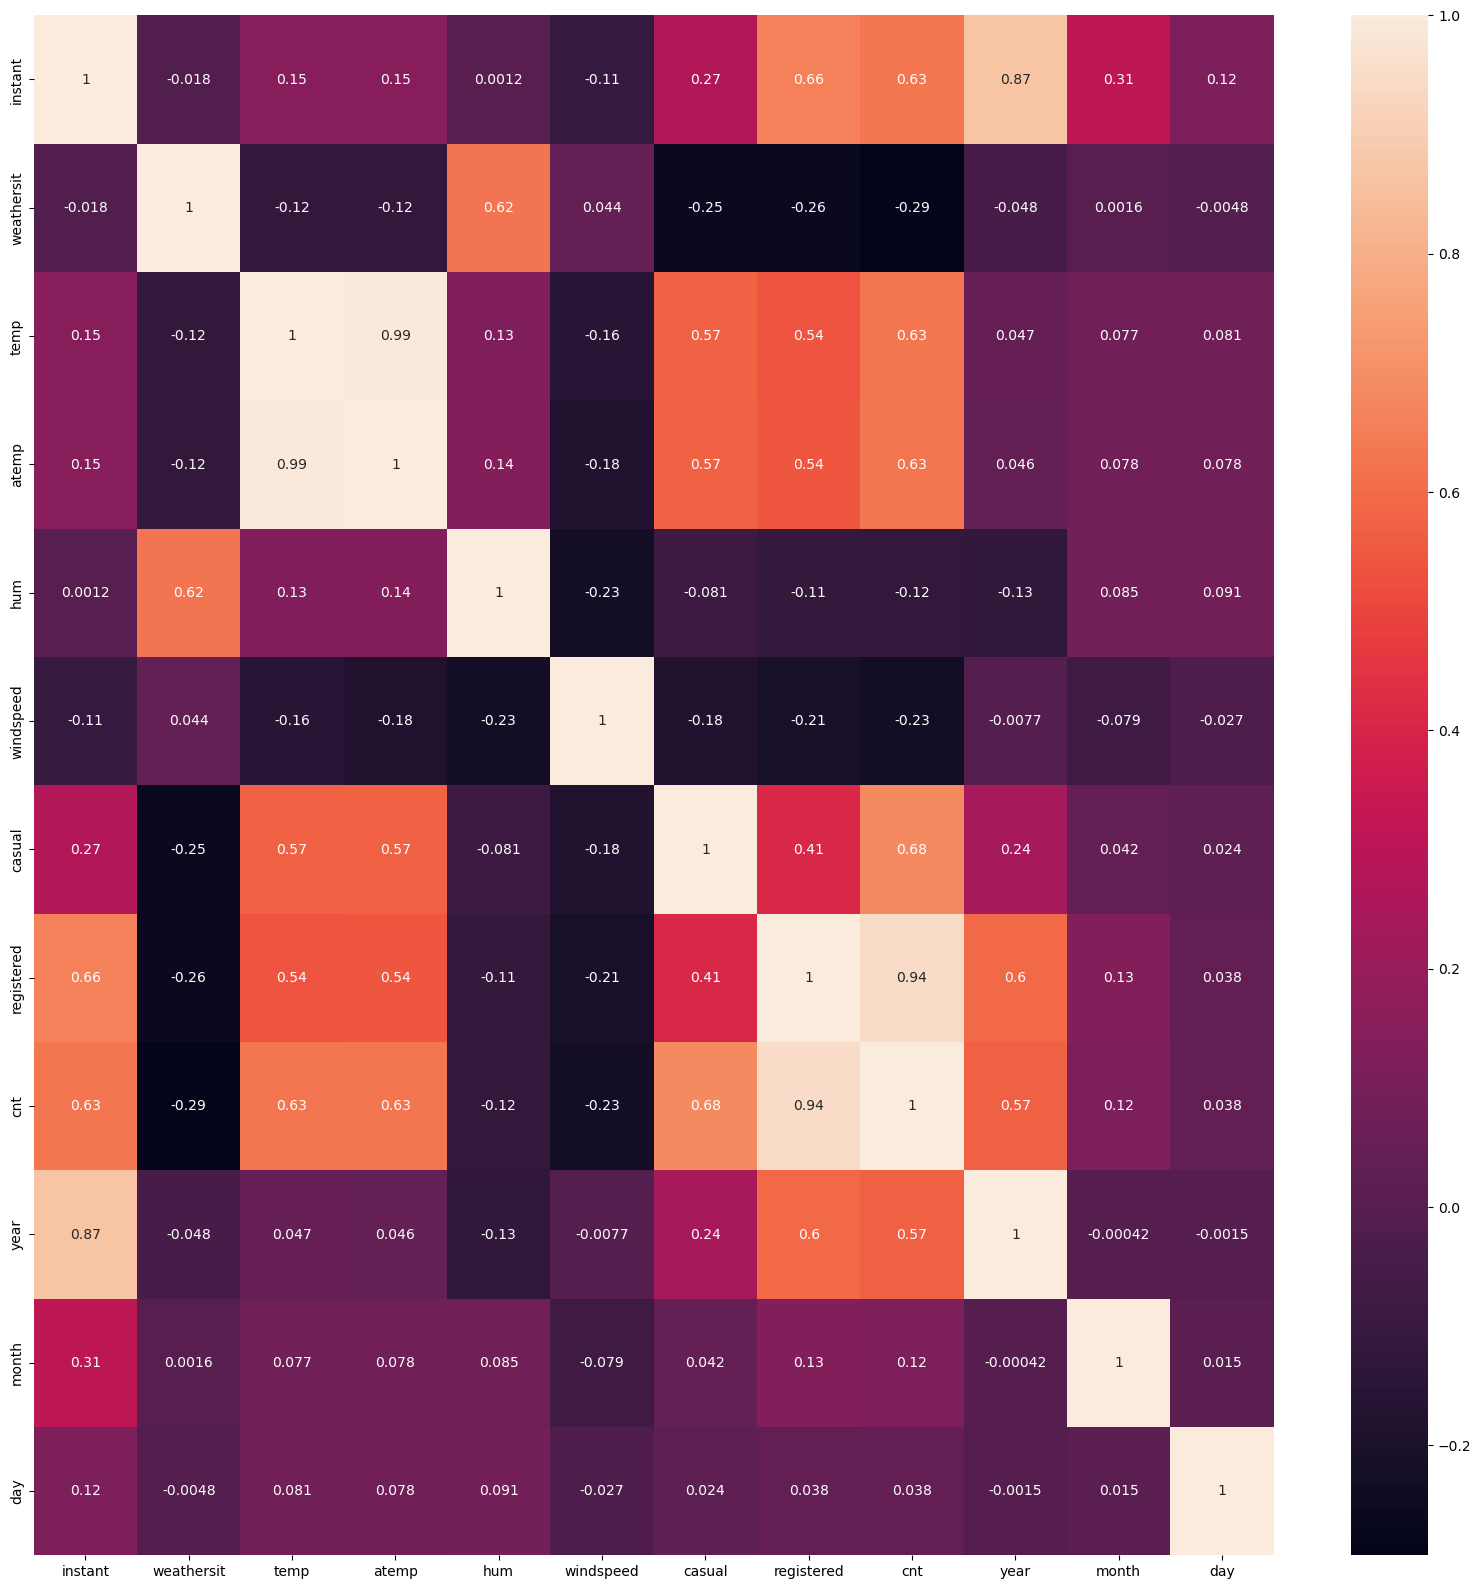

In [89]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# VIF

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
vif=df

In [92]:
vif_data=pd.DataFrame()
vif_data['feature']=vif.columns
vif_data['VIF']=[variance_inflation_factor(vif.values,i)for i in range(len(vif.columns))]
vif_data

,feature,VIF
0,instant,10.451555
1,weathersit,14.918326
2,temp,530.553813
3,atemp,613.388825
4,hum,43.644133
5,windspeed,8.994106
6,casual,134.859002
7,registered,1562.944547
8,cnt,2368.705960
9,year,59.139537


In [93]:
df.drop('registered',axis=1,inplace=True)

In [94]:
vif_data=pd.DataFrame()
vif_data['feature']=vif.columns
vif_data['VIF']=[variance_inflation_factor(vif.values,i)for i in range(len(vif.columns))]
vif_data

,feature,VIF
0,instant,10.436658
1,weathersit,14.834940
2,temp,529.851416
3,atemp,613.388551
4,hum,43.634812
5,windspeed,8.968110
6,casual,5.756347
7,cnt,33.404261
8,year,58.986526
9,month,5.319099


In [95]:
df.drop('atemp',axis=1,inplace=True)

In [96]:
vif_data=pd.DataFrame()
vif_data['feature']=vif.columns
vif_data['VIF']=[variance_inflation_factor(vif.values,i)for i in range(len(vif.columns))]
vif_data

,feature,VIF
0,instant,10.412210
1,weathersit,14.775831
2,temp,19.721448
3,hum,42.980333
4,windspeed,8.755453
5,casual,5.756125
6,cnt,33.193838
7,year,55.462602
8,month,5.319085
9,day,4.415802


In [97]:
df.drop('year',axis=1,inplace=True)

In [98]:
vif_data=pd.DataFrame()
vif_data['feature']=vif.columns
vif_data['VIF']=[variance_inflation_factor(vif.values,i)for i in range(len(vif.columns))]
vif_data

,feature,VIF
0,instant,10.137059
1,weathersit,14.775637
2,temp,19.650192
3,hum,28.468350
4,windspeed,5.359987
5,casual,5.739843
6,cnt,28.923970
7,month,5.076214
8,day,4.264239


In [99]:
df.drop('hum',axis=1,inplace=True)

In [102]:
vif_data=pd.DataFrame()
vif_data['feature']=vif.columns
vif_data['VIF']=[variance_inflation_factor(vif.values,i)for i in range(len(vif.columns))]
vif_data

,feature,VIF
0,instant,7.960943
1,weathersit,5.589821
2,windspeed,5.274427
3,casual,5.584473
4,cnt,16.812336
5,month,4.587112
6,day,3.859365


In [101]:
df.drop('temp',axis=1,inplace=True)

In [103]:
vif_data=pd.DataFrame()
vif_data['feature']=vif.columns
vif_data['VIF']=[variance_inflation_factor(vif.values,i)for i in range(len(vif.columns))]
vif_data

,feature,VIF
0,instant,7.960943
1,weathersit,5.589821
2,windspeed,5.274427
3,casual,5.584473
4,cnt,16.812336
5,month,4.587112
6,day,3.859365


In [104]:
x=df.drop('cnt',axis=1)

In [105]:
y=df['cnt']

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [107]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [108]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)

LinearRegression()

In [109]:
y_pred=lr.predict(xtest)

In [110]:
r2_score(ytest,y_pred)

0.7251500202186538

In [111]:
mean_squared_error(ytest,y_pred)

1093221.1013780523

In [112]:
np.sqrt(mean_squared_error(ytest,y_pred))

1045.572140685688

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='cnt'>

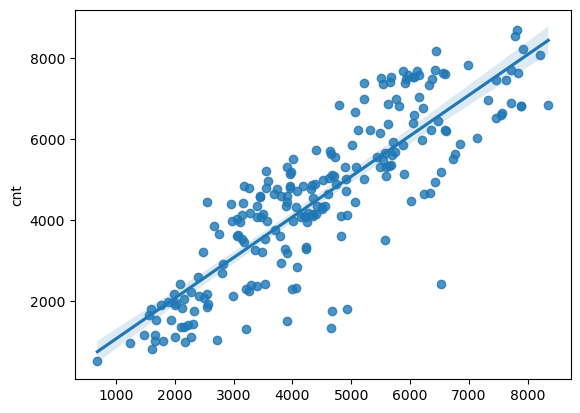

In [113]:
sns.regplot(y_pred,ytest)


# Residual Analysis

In [114]:
res=ytest-y_pred

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cnt', ylabel='Density'>

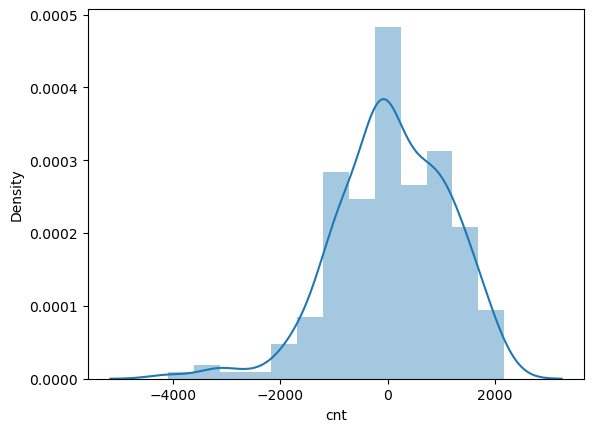

In [115]:
sns.distplot(res)

# Homoscedasticity

C:\Users\imvv44\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='cnt'>

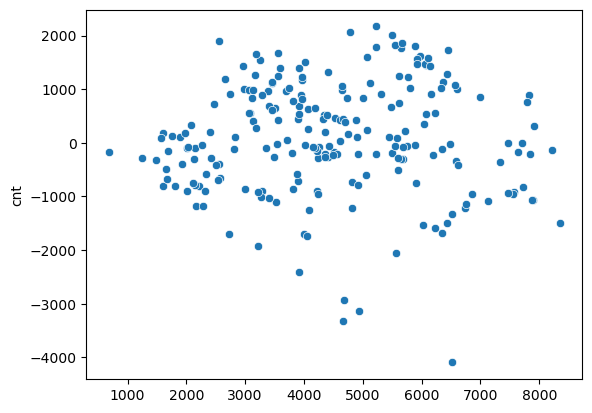

In [116]:
# Plotting a scatter plot for residuals and y predicted values 
sns.scatterplot(y_pred,res)

In [117]:

from statsmodels.formula.api import ols
import statsmodels.formula.api as smf 
import statsmodels.api as sm

In [118]:
x = sm.add_constant(xtrain) # Add a constant term to the independent variables

In [119]:
model = sm.OLS(ytrain, x).fit()

In [120]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     196.1
Date:                Fri, 14 Apr 2023   Prob (F-statistic):          4.26e-128
Time:                        14:50:49   Log-Likelihood:                -4257.8
No. Observations:                 509   AIC:                             8530.
Df Residuals:                     502   BIC:                             8559.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3233.8648    245.099     13.194      0.000    2752.319    3715.410
instant        4.7156      0.249     18.940      0.000       4.226       5.205
weathersit  -552.3067     88.877     -6.214      0.000    -726.924    -377.689
windspeed    -37.7807      9.516     -3.970      0.000     -56.477     -19.084
casual         1.4862      0.082     18.158      0.000       1.325       1.647
month        -42.7273     14.170     -3.015      0.003     -70.567     -14.888
day          -10.7583      5.343     -2.014      0.045     -21.256      -0.261
==============================================================================
Omnibus:                       42.709   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.359
Skew:                          -0.706   Prob(JB):                     4.27e-12
Kurtosis:                       3.691   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""